In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('Elon_musk.csv', encoding='Latin-1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df = [Text.strip() for Text in df['Text']]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [5]:
df=[Text for Text in df if Text]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
#Again Joining the list into one string/text
t_text = ' '.join(df)

In [7]:
#Removing Twitter username

from nltk.tokenize import TweetTokenizer
tt= TweetTokenizer(strip_handles=True)
tweet_tokens = tt.tokenize(t_text)
tweet_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 'Great',
 'interview',
 '!',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https://t.co/9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 ',',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 'Himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zGxJFDzzrM',
 'Haha',
 'thanks',
 ':)',
 'Indeed',
 '!',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'https://t.co/3rWE9uHSTS',
 'It',
 '

In [8]:
tweet_text_token = ' '.join(tweet_tokens)
tweet_text_token

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [9]:
#Remove Punctions
no_punct_text = tweet_text_token.translate(str.maketrans('','', string.punctuation))
no_punct_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [10]:
#Removing https or url within text
import re
no_url_text = re.sub(r'http\S+','',no_punct_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [11]:
from nltk.tokenize import word_tokenize
text_token = word_tokenize(no_url_text)
text_token

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [12]:
#Tokennization

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Normalising the data
lower_words = [x.lower() for x in text_token]
lower_words

['i',
 '\x92',
 'm',
 'an',
 'alien',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'nextlevel',
 'have',
 'you',
 'tried',
 'it',
 'great',
 'interview',
 'doge',
 'is',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'just',
 'sent',
 'some',
 'just',
 'agree',
 'to',
 'do',
 'clubhouse',
 'with',
 'it',
 '\x92',
 's',
 'getting',
 'real',
 'bought',
 'some',
 'dogecoin',
 'for',
 'lil',
 'x',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'he',
 'definitel

In [14]:
#Removing stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
no_SW_token = [word for word in lower_words if word not in my_stop_words]
no_SW_token

['\x92',
 'alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'would',
 'fail',
 'haha',
 'thanks',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'likely',
 'sent',
 'agree',
 'clubhouse',
 '\x92',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'thanks',
 'fixing',
 'please',
 'unlock',
 'account',
 'u0001f923',
 'u0001f923',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 '\x92',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'app',
 'sucks',
 'rt',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'elements',
 'lunar',
 'gateway',
 'to

In [16]:
# Lemmatization
nlp= spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
doc

i  m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it  s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha any crypto wallet that won  t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo star

In [17]:
lemmas = [token.lemma_ for token in doc]
lemmas

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'ray',
 'trace',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'be',
 'nextlevel',
 'have',
 'you',
 'try',
 'it',
 'great',
 'interview',
 'doge',
 'be',
 'underestimate',
 'congratulation',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'frodo',
 'be',
 'the',
 'underdoge',
 'all',
 'think',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'most',
 'entertaining',
 'outcome',
 'be',
 'the',
 'most',
 'likely',
 'just',
 'send',
 'some',
 'just',
 'agree',
 'to',
 'do',
 'clubhouse',
 'with',
 'it',
 '\x92',
 's',
 'get',
 'real',
 'buy',
 'some',
 'dogecoin',
 'for',
 'lil',
 'x',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'have',
 'iss

In [18]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'I \x92 m an alien ray trace on cyberpunk with hdr be nextlevel have you try it great interview doge be underestimate congratulation tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo be the underdoge all think he would fail himself most of all haha thank indeed tweet definitely do not represent realworld time allocation the most entertaining outcome be the most likely just send some just agree to do clubhouse with it \x92 s get real buy some dogecoin for lil x so he can be a toddler hodler he definitely have issue but the sentencing seem a bit high thank for fix please unlock my account u0001f923 u0001f923 this be true power haha any crypto wallet that win \x92 t give you your private key should be avoid at all cost your app suck rt nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo starlink be a staggering

## Feature Extraction

#### CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
tweet_cv = cv.fit_transform(lemmas)

In [20]:
cv.vocabulary_

{'an': 225,
 'alien': 195,
 'ray': 2360,
 'trace': 3021,
 'on': 2041,
 'cyberpunk': 768,
 'with': 3380,
 'hdr': 1362,
 'be': 375,
 'nextlevel': 1969,
 'have': 1356,
 'you': 3418,
 'try': 3052,
 'it': 1583,
 'great': 1308,
 'interview': 1562,
 'doge': 892,
 'underestimate': 3187,
 'congratulation': 674,
 'tesla': 2928,
 'china': 583,
 'for': 1179,
 'amazing': 218,
 'execution': 1060,
 'last': 1649,
 'year': 3409,
 'now': 1998,
 'to': 2989,
 'the': 2942,
 'next': 1968,
 'even': 1034,
 'more': 1905,
 'happy': 1343,
 'new': 1966,
 'of': 2031,
 'ox': 2100,
 'frodo': 1209,
 'underdoge': 3186,
 'all': 197,
 'think': 2958,
 'he': 1363,
 'would': 3394,
 'fail': 1094,
 'himself': 1406,
 'most': 1909,
 'haha': 1332,
 'thank': 2938,
 'indeed': 1503,
 'tweet': 3067,
 'definitely': 806,
 'do': 886,
 'not': 1992,
 'represent': 2427,
 'realworld': 2375,
 'time': 2981,
 'allocation': 199,
 'entertaining': 1005,
 'outcome': 2078,
 'likely': 1701,
 'just': 1607,
 'send': 2568,
 'some': 2705,
 'agree': 18

In [21]:
cv.get_feature_names_out()

array(['000', '005', '10', ..., 'zon', 'zone', 'ðogecoin'], dtype=object)

In [22]:
tweet_cv.toarray().shape

(17872, 3430)

#### CountVectorizer with N-gram

In [23]:
cv_ngram= CountVectorizer(analyzer='word', ngram_range=(1,3), max_features=100)
matrix_ngram = cv_ngram.fit_transform(lemmas)

In [24]:
print(cv_ngram.get_feature_names_out())
print(matrix_ngram.toarray())

['about' 'all' 'also' 'an' 'and' 'as' 'at' 'be' 'but' 'by' 'can' 'car'
 'come' 'crew' 'day' 'do' 'dragon' 'engine' 'falcon' 'few' 'first'
 'flight' 'for' 'from' 'get' 'go' 'good' 'great' 'haha' 'have' 'he' 'high'
 'if' 'in' 'it' 'just' 'land' 'launch' 'like' 'lot' 'make' 'maybe' 'model'
 'more' 'most' 'much' 'my' 'need' 'new' 'next' 'no' 'not' 'now' 'of' 'on'
 'one' 'only' 'or' 'our' 'out' 'people' 'probably' 'production' 're' 'rt'
 'should' 'so' 'some' 'soon' 'spacex' 'starship' 'still' 'sure' 'tesla'
 'test' 'than' 'that' 'the' 'there' 'they' 'this' 'time' 'to' 'too' 'true'
 'u0001f923' 'use' 'very' 'we' 'well' 'what' 'will' 'with' 'work' 'would'
 'yeah' 'year' 'yes' 'you' 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(norm='l2', ngram_range=(1,3), max_features=500)
matrix_tf = tf_vect.fit_transform(lemmas)

In [26]:
print(tf_vect.get_feature_names_out())
print(matrix_tf.toarray())

['10' '100' '13' '20' '2020' '30' '40' '60' 'able' 'about' 'absolutely'
 'access' 'accurate' 'actually' 'add' 'after' 'again' 'ago' 'agree' 'ai'
 'aim' 'air' 'all' 'almost' 'already' 'also' 'although' 'amazing' 'an'
 'and' 'another' 'any' 'appear' 'apply' 'appreciate' 'around' 'article'
 'as' 'astronaut' 'at' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'base'
 'battery' 'be' 'because' 'become' 'before' 'berlin' 'beta' 'between'
 'big' 'bit' 'boca' 'body' 'booster' 'both' 'brain' 'bs' 'build' 'but'
 'buy' 'by' 'call' 'camera' 'can' 'car' 'cargo' 'cast' 'catch' 'cell'
 'chance' 'change' 'china' 'civilization' 'close' 'cold' 'come' 'company'
 'complete' 'computer' 'confirm' 'congratulation' 'control' 'cool' 'cost'
 'could' 'course' 'cov' 'crazy' 'create' 'crew' 'critical' 'curevac'
 'cyberpunk' 'cybertruck' 'datum' 'day' 'deep' 'definitely' 'design'
 'detail' 'didn' 'difference' 'different' 'do' 'dock' 'doesn' 'doge'
 'dojo' 'don' 'down' 'dragon' 'drive' 'droneship' 'early' 'earth' 'easy'
 '

## Generating Word Cloud

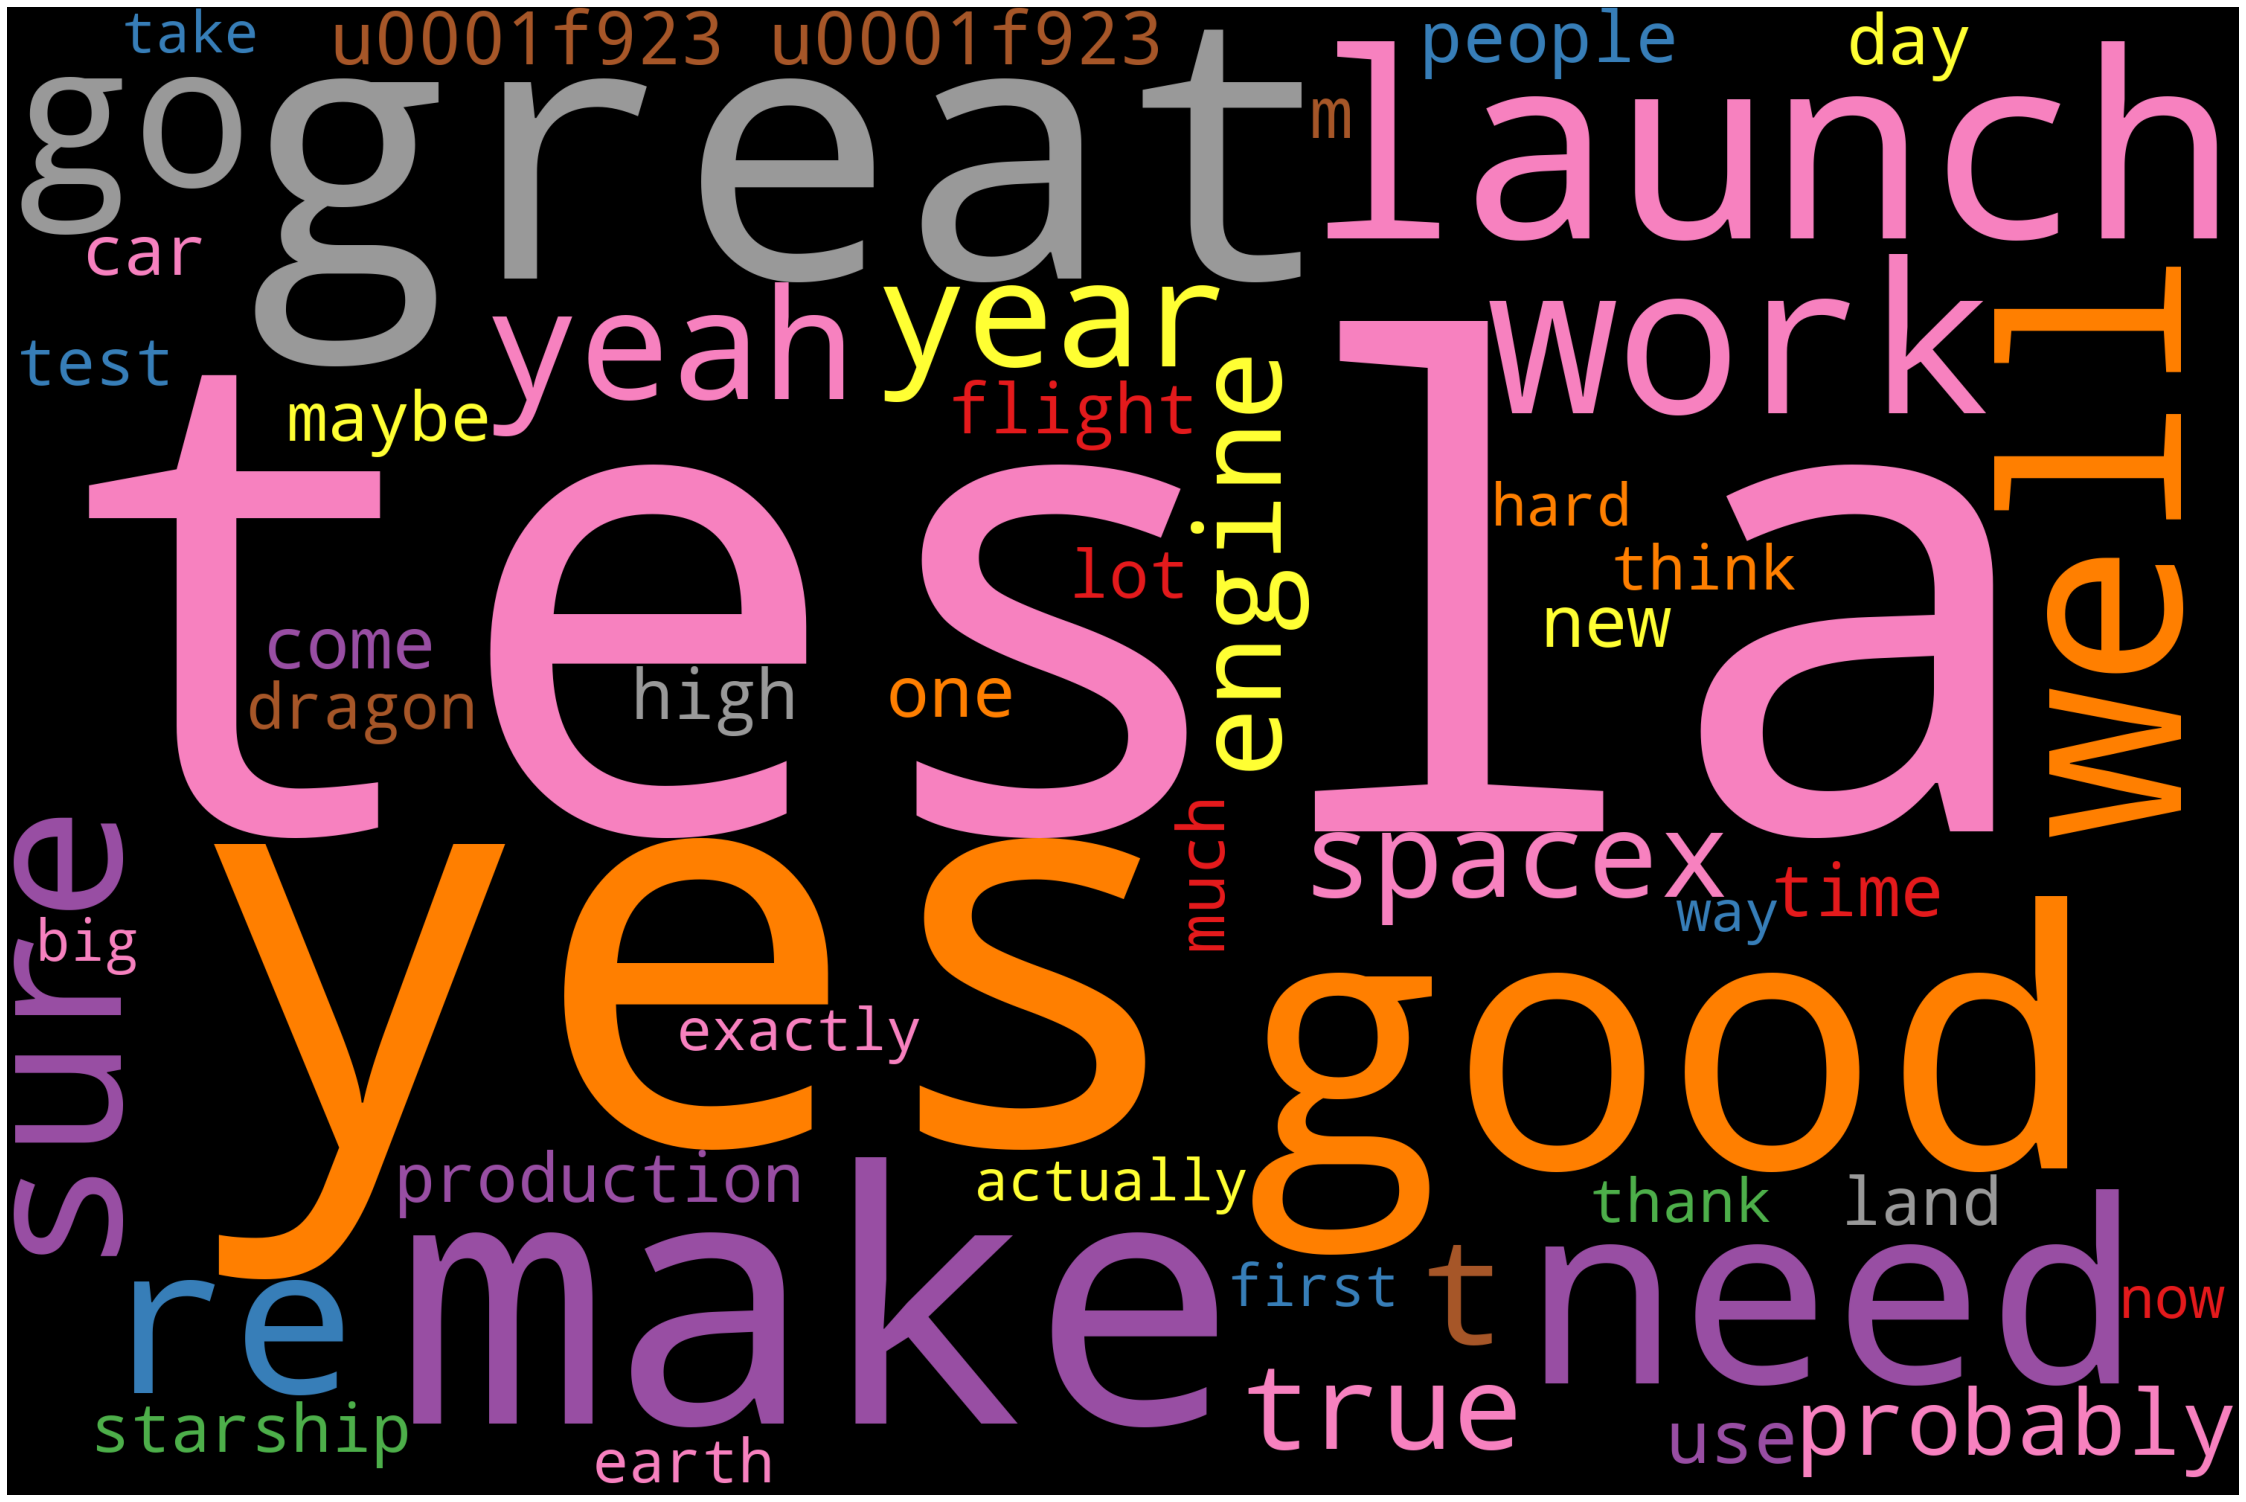

In [27]:
#Define a function to plot word cloud
def plot_cloud(word_c):
    plt.figure(figsize=(40,30))
    plt.imshow(word_c)
    plt.axis('off')
    
#Generate Word Cloud
STOPWORDS.add('will')
STOPWORDS.add('rts')
STOPWORDS.add('S')
STOPWORDS.add('rt')
STOPWORDS.add('haha')
STOPWORDS.add('ye')
word_cloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(word_cloud)

## Named Entity Recognition

In [28]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [29]:
for token in doc_block:
    print(token, token.pos_)

I PRON
 VERB
m VERB
an DET
alien ADJ
ray NOUN
trace NOUN
on ADP
cyberpunk NOUN
with ADP
hdr PROPN
be AUX
nextlevel NOUN
have AUX
you PRON
try VERB
it PRON
great ADJ
interview NOUN
doge PROPN
be AUX
underestimate ADJ
congratulation NOUN
tesla PROPN
china PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADV
happy ADJ
new ADJ
year NOUN
of ADP
the DET
ox ADJ
frodo NOUN
be AUX
the DET
underdoge NOUN
all PRON
think VERB
he PRON
would AUX
fail VERB
himself PRON
most ADJ
of ADP
all PRON
haha AUX
thank VERB
indeed ADV
tweet PROPN
definitely ADV
do AUX
not PART
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
most ADV
entertaining ADJ
outcome NOUN
be AUX
the DET
most ADV
likely ADJ
just ADV
send VERB
some PRON
just ADV
agree VERB
to PART
do VERB
clubhouse VERB
with ADP
it PRON
 PROPN
s PART
get VERB
real ADJ
buy VERB
some DET
dogecoin NOUN
for ADP
lil NOUN
x PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddle

be AUX
great ADJ
be AUX
instrumental ADJ
in AUX
develop VERB
early ADJ
ver NOUN
t NOUN
w PROPN
will AUX
be AUX
15 NUM
so SCONJ
it PRON
will AUX
accelerate VERB
unusually ADV
fast ADJ
high ADJ
t NOUN
w NOUN
be AUX
important ADJ
for ADP
reusable NOUN
v NOUN
no DET
escape NOUN
that PRON
for SCONJ
I PRON
read VERB
the DET
whole ADJ
article NOUN
u0001f923 VERB
u0001f923 PROPN
warm ADJ
sunny ADJ
day NOUN
snowy ADJ
mountain NOUN
what PRON
a DET
beautiful ADJ
day NOUN
in ADP
la INTJ
yeah INTJ
dr PROPN
frankensteen PROPN
I PRON
never ADV
use VERB
this DET
guy NOUN
he PRON
give VERB
a DET
talk NOUN
at ADP
spacex NOUN
once ADV
only ADV
halo NOUN
I PRON
sure ADV
hope VERB
that SCONJ
 PROPN
s VERB
not PART
true ADJ
at ADP
tesla NOUN
or CCONJ
spacex VERB
cryoproof NOUN
then ADV
install VERB
engine NOUN
starship NOUN
sn9 PUNCT
sn10 PROPN
in ADP
retrospect NOUN
it PRON
be AUX
inevitable ADJ
great ADJ
shot NOUN
live ADV
by ADP
the DET
sword NOUN
die VERB
by ADP
the DET
sword NOUN
entropy PROPN
buy VER

norris PROPN
can AUX
divide VERB
by ADP
zero NUM
good ADJ
point NOUN
the DET
thing NOUN
we PRON
call VERB
money NOUN
be AUX
just ADV
an DET
information NOUN
system NOUN
for ADP
labor NOUN
allocation NOUN
what PRON
actuall ADV
monty NOUN
python PROPN
be VERB
amazing ADJ
they PRON
sure ADV
can AUX
twist VERB
the DET
knife NOUN
in ADP
that DET
show NOUN
probably ADV
wise ADJ
we PRON
 PROPN
re AUX
make VERB
major ADJ
improvement NOUN
to PART
ease NOUN
of ADP
engine NOUN
swap NOUN
need VERB
to PART
be AUX
a DET
few ADJ
hour NOUN
at ADP
most ADJ
two NUM
of ADP
the DET
engine NOUN
need VERB
slight ADJ
repair NOUN
so ADV
will AUX
be AUX
switch VERB
out ADP
nice ADJ
shot NOUN
we PRON
don VERB
 PROPN
t NOUN
have VERB
high ADJ
school NOUN
internship NOUN
but CCONJ
please INTJ
apply VERB
when SCONJ
you PRON
 VERB
re VERB
in ADP
college NOUN
prototype NOUN
be AUX
easy ADJ
volume NOUN
production NOUN
be AUX
hard ADJ
positive ADJ
cash NOUN
flow NOUN
be AUX
excruciating ADJ
physic NOUN
rt NOUN
spla

hang VERB
out ADP
have AUX
pseudo NOUN
intellectual ADJ
conversation NOUN
come VERB
for SCONJ
the DET
comment NOUN
stay VERB
for ADP
the DET
meme ADJ
u0001f484 NOUN
absolutely ADV
we PRON
will AUX
release VERB
fsd NOUN
subscription NOUN
early ADV
next ADJ
year NOUN
one NUM
word NOUN
doge PROPN
bitcoin NOUN
be AUX
almost ADV
as ADV
bs ADJ
as SCONJ
fiat ADJ
money NOUN
great ADJ
nail NOUN
lipstick NOUN
sound NOUN
about ADP
right ADJ
 PROPN
lord PROPN
 ADV
edge VERB
nice ADJ
branding NOUN
just ADV
kid NOUN
who PRON
need VERB
a DET
safe ADJ
word NOUN
anyway ADV
bitcoin NOUN
be AUX
my PRON
safe ADJ
word NOUN
rt PROPN
falcon NOUN
9 NUM
 PROPN
s PART
first ADJ
stage NOUN
have AUX
land NOUN
on ADP
land NOUN
zone NOUN
1 NUM
rt NOUN
liftoff NOUN
stand VERB
down ADP
for ADP
today NOUN
to PART
inspect VERB
rocket NOUN
hopefully ADV
launch VERB
tomorrow NOUN
pressure NOUN
be AUX
slightly ADV
high ADJ
in ADP
upper ADJ
stage NOUN
liquid ADJ
oxygen NOUN
tank NOUN
review NOUN
underway ADV
I PRON
be V

training NOUN
with ADP
dojo NOUN
int NOUN
8 NUM
for ADP
almost ADV
all PRON
heavy ADJ
lifting NOUN
in ADP
inference NOUN
work NOUN
great ADJ
but CCONJ
actually ADV
happy ADJ
thanksgiving NOUN
hopefully ADV
next ADJ
month NOUN
ok ADP
overall ADJ
air NOUN
suspension NOUN
height NOUN
damp VERB
algorithm PROPN
be AUX
haha NOUN
true ADJ
the DET
promise NOUN
be AUX
greatly ADV
need VERB
we PRON
will AUX
have VERB
special ADJ
color NOUN
for ADP
new ADJ
roadster NOUN
as SCONJ
we PRON
do VERB
for ADP
the DET
original ADJ
u0001f923 ADJ
u0001f923 PROPN
be VERB
savage ADJ
u0001f923 ADJ
u0001f923 ADJ
if SCONJ
you PRON
ever ADV
wonder VERB
where SCONJ
we PRON
come VERB
from ADP
this PRON
be AUX
a DET
life NOUN
leader NOUN
launch NOUN
so ADV
more ADJ
risk NOUN
than ADP
normal ADJ
yes INTJ
but CCONJ
only ADV
slightly ADV
fill VERB
this PRON
be AUX
a DET
subject NOUN
of ADP
much ADJ
debate NOUN
major ADJ
upgrade NOUN
be AUX
slate NOUN
for ADP
sn15 PROPN
many ADJ
small ADJ
improvement NOUN
but CCONJ
ove

design NOUN
be AUX
really ADV
bad ADJ
tbh NOUN
nothing PRON
work VERB
well INTJ
maybe ADV
I PRON
just ADV
love VERB
irony NOUN
haha VERB
they PRON
 VERB
re ADP
on ADP
their PRON
way NOUN
hopefully ADV
more ADJ
teslaquila NOUN
next ADJ
month NOUN
special ADJ
permission NOUN
receive VERB
from ADP
stonecutter ADJ
guild NOUN
fate NOUN
u0001f5a4 NOUN
irony NOUN
well ADV
say VERB
u0001f47b PROPN
u0001f4b5 ADJ
damn NOUN
that PRON
 PROPN
s AUX
not PART
easy ADJ
I PRON
spend VERB
quite DET
a DET
bit NOUN
of ADP
time NOUN
look VERB
at ADP
russian ADJ
ukrainian ADJ
engine NOUN
they PRON
 PROPN
re VERB
good PROPN
yes INTJ
rt PROPN
docking NOUN
confirm PROPN
 PROPN
crew NOUN
dragon NOUN
have AUX
arrive VERB
at ADP
the DET
u0001f3b6 PROPN
toss VERB
a DET
bitcoin NOUN
to ADP
ur VERB
witcher ADP
u0001f3b6 PROPN
u0001f609 PROPN
rt PROPN
u0001f409 PROPN
enter VERB
the DET
crew NOUN
dragon NOUN
at ADP
448 NUM
p NOUN
m VERB
est NOUN
948 NUM
p NOUN
m AUX
utc VERB
the DET
nasa PROPN
crew PROPN
1 NUM
ast

 PROPN
s PART
happen VERB
to ADP
I PRON
it PRON
 PROPN
s PART
happen VERB
to ADP
other ADJ
I PRON
 PROPN
m AUX
get VERB
pcr ADJ
test NOUN
from ADP
separate ADJ
lab NOUN
result NOUN
will AUX
take VERB
about ADV
24 NUM
hour NOUN
something PRON
extremely ADV
bogus ADJ
be AUX
go VERB
on ADV
be AUX
test NOUN
for ADP
covid ADJ
four NUM
time NOUN
today NOUN
two NUM
test NOUN
come VERB
back ADV
negative ADJ
two NUM
cam NOUN
burst NOUN
disk NOUN
work NOUN
so SCONJ
vehicle NOUN
appear VERB
to PART
be AUX
ok INTJ
we PRON
 PROPN
ll AUX
have VERB
to PART
swap VERB
out ADP
at ADV
least ADJ
one NUM
of ADP
the DET
engine NOUN
maybe ADV
melt VERB
an DET
engine NOUN
preburner NOUN
or CCONJ
fuel NOUN
hot ADJ
gas NOUN
manifold ADJ
whatev NOUN
we PRON
lose VERB
vehicle NOUN
pneumatics NOUN
reason NOUN
unknown ADJ
at ADP
present ADJ
liquid ADJ
oxygen NOUN
header NOUN
tank NOUN
pressure NOUN
be AUX
risin NOUN
u0001f923 ADJ
u0001f923 PROPN
u0001f44d PROPN
rt PROPN
tesla ADJ
top ADJ
list NOUN
of ADP
2020 N

although SCONJ
if SCONJ
it PRON
fail VERB
right ADV
at ADP
the DET
end NOUN
some DET
land NOUN
minor ADJ
understanding NOUN
exactly ADV
how SCONJ
the DET
body NOUN
flap VERB
control PROPN
pitch PROPN
yaw PROPN
roll PROPN
duri PROPN
but CCONJ
a DET
rud PROPN
right ADV
off ADP
launch NOUN
pad NOUN
be AUX
also ADV
possible ADJ
fortunately ADV
sn9 PUNCT
be AUX
almost ADV
ready ADJ
stable ADJ
control NOUN
descent NOUN
with ADP
body NOUN
flap NOUN
would AUX
be AUX
great ADJ
transfer NOUN
propellant NOUN
every DET
5 NUM
to PART
10 NUM
day NOUN
fault NOUN
will AUX
never ADV
be AUX
zero NUM
but CCONJ
at ADP
some DET
point NOUN
the DET
probability NOUN
of ADP
a DET
fault NOUN
wi ADV
we PRON
measure VERB
this PRON
primarily ADV
in ADP
intervention NOUN
probability NOUN
this DET
update NOUN
address NOUN
several ADJ
issu NOUN
thank VERB
to ADP
a DET
great ADJ
autopilot NOUN
ai AUX
team NOUN
work VERB
super ADV
hard ADV
do AUX
 PROPN
neural ADJ
net NOUN
 PROPN
without ADP
test NOUN
they PRON
again

or CCONJ
rt PROPN
tesla NOUN
model PROPN
3 NUM
sr PROPN
have VERB
low ADJ
energy NOUN
consumption NOUN
of ADP
all DET
bevs NOUN
say VERB
report NOUN
very ADV
creative ADJ
that SCONJ
free ADJ
fusion NOUN
reactor NOUN
in ADP
the DET
sky NOUN
conveniently ADV
convert VERB
4 NUM
million NUM
ton NOUN
of ADP
mass NOUN
into ADP
energy NOUN
every DET
second NOUN
you PRON
never ADV
know VERB
after ADP
u0001f622 ADJ
also ADV
system NOUN
should AUX
autodelete VERB
old ADJ
datum NOUN
automatically ADV
by ADP
default NOUN
table NOUN
in ADP
tension NOUN
yes INTJ
start VERB
production NOUN
on ADP
7 NUM
seater NOUN
next ADJ
month NOUN
initial ADJ
delivery NOUN
early ADJ
december PROPN
the DET
gauntlet NOUN
have AUX
be AUX
throw VERB
down ADP
the DET
prophecy NOUN
will AUX
be AUX
fulfil NOUN
model NOUN
s PART
price NOUN
change NOUN
to ADP
69420 NUM
tonight NOUN
congratulation NOUN
make VERB
progress NOUN
9 NUM
meter NOUN
or CCONJ
roughly ADV
30 NUM
ft NOUN
diameter NOUN
will AUX
be AUX
less ADJ
roomy A

be AUX
cut VERB
off ADP
replace NOUN
with ADP
a DET
bolted ADJ
part NOUN
for ADP
collision NOUN
repair NOUN
sandy ADJ
munro NOUN
understand VERB
engineering NOUN
that PRON
would AUX
be AUX
like ADP
license NOUN
battlestar NOUN
galactica PROPN
actually ADV
buil VERB
yes INTJ
the DET
gigafactory NOUN
be AUX
the DET
hard ADV
most ADV
critical ADJ
product NOUN
battery NOUN
pack NOUN
will AUX
be AUX
a DET
bond NOUN
structure NOUN
with ADP
cell NOUN
provide VERB
shear NOUN
transfer NOUN
b NOUN
but CCONJ
now ADV
we PRON
understand VERB
production NOUN
much ADV
well ADV
it PRON
will AUX
be AUX
our PRON
primary ADJ
competitive ADJ
advantage NOUN
longterm NOUN
even ADV
gm PROPN
chrysler PROPN
go VERB
bankrupt ADJ
in ADP
2009 NUM
ford NOUN
and CCONJ
tesla NOUN
be AUX
the DET
only ADJ
us PROPN
car NOUN
company NOUN
t NOUN
the DET
model NOUN
3 NUM
production NOUN
ramp NOUN
be AUX
sheer ADJ
agony NOUN
for ADP
two NUM
year NOUN
but CCONJ
that PRON
be AUX
do VERB
or CCONJ
die VERB
for ADP
te X
bring V

energy NOUN
nickel NOUN
ourselves PRON
at ADP
least ADJ
for ADP
now ADV
also ADV
maybe ADV
the DET
presenta NOUN
u0001f923 VERB
u0001f923 ADJ
check NOUN
into ADP
it PRON
totally ADV
up ADV
to ADP
you PRON
but CCONJ
if SCONJ
you PRON
head VERB
to ADP
a DET
tesla ADJ
delivery NOUN
center NOUN
near ADP
you PRON
maybe ADV
help VERB
out ADP
new ADJ
owner NOUN
that PRON
would AUX
be AUX
cool ADJ
completely ADV
agree VERB
yes INTJ
the DET
flap NOUN
be AUX
now ADV
directly ADV
drive VERB
by ADP
electric ADJ
motor NOUN
with ADP
a DET
gearbox NOUN
no ADV
more ADV
hydraulics NOUN
thank VERB
tesla NOUN
team NOUN
for ADP
great ADJ
work NOUN
on ADP
delivery NOUN
for ADP
new ADJ
owner NOUN
we PRON
super ADV
appreciate VERB
accommodate VERB
we PRON
on ADP
delivery NOUN
ti INTJ
there PRON
be AUX
time NOUN
when SCONJ
I PRON
feel VERB
like ADP
I PRON
 PROPN
m VERB
live ADJ
in ADP
a DET
dilbert NOUN
cartoon NOUN
that PRON
specie NOUN
have AUX
stand VERB
the DET
test NOUN
of ADP
time NOUN
mostly ADV
304l 

tunnel NOUN
under ADP
city NOUN
with ADP
selfdrive ADJ
electric ADJ
car NOUN
will AUX
feel VERB
like ADP
warp ADJ
drive NOUN
first ADJ
operational ADJ
tunnel NOUN
under ADP
vega PROPN
for ADP
sure ADJ
good ADJ
point NOUN
have AUX
you PRON
hug VERB
a DET
tunnel NOUN
today NOUN
good ADJ
analysis NOUN
exactly ADV
gary ADJ
the DET
snail NOUN
be AUX
still ADV
win VERB
but CCONJ
we PRON
 VERB
re VERB
gain NOUN
on ADP
he PRON
her PRON
embrace VERB
tunnel NOUN
tunnel NOUN
be AUX
the DET
solution NOUN
to ADP
traffic NOUN
you PRON
can AUX
have VERB
as ADV
many ADJ
level NOUN
as SCONJ
you PRON
want VERB
usable ADJ
tunnel NOUN
depth NOUN
far ADV
e NOUN
just ADV
a DET
guess NOUN
but CCONJ
probably ADV
mid ADJ
teen NOUN
booster NOUN
stack NOUN
on ADP
orbital ADJ
pad NOUN
be AUX
likely ADJ
limiti PROPN
pretty ADV
accurate ADJ
simulation NOUN
although SCONJ
sn8 PROPN
will AUX
use VERB
3 NUM
raptor NOUN
if SCONJ
sn8 PROPN
crater NOUN
sn9 PUNCT
sn10 PROPN
be VERB
close ADV
behind ADP
couldn PROPN
 PRO

rise NOUN
of ADP
hellenism NOUN
and CCONJ
film NOUN
study NOUN
wow INTJ
I PRON
super ADJ
love VERB
astronomy NOUN
but CCONJ
take VERB
it PRON
at ADP
queen PROPN
not PART
penn NOUN
definitely ADV
one NUM
of ADP
my PRON
favorite ADJ
class NOUN
yeah INTJ
he PRON
send VERB
it PRON
to ADP
I PRON
through ADP
a DET
mutual ADJ
physics NOUN
prof NOUN
friend NOUN
at ADP
caltech NOUN
cern NOUN
very ADV
ba VERB
it PRON
 PROPN
s PRON
too ADV
embarrassing ADJ
just ADV
learn VERB
that SCONJ
my PRON
physics NOUN
prof NOUN
from ADP
penn PROPN
be VERB
head NOUN
of ADP
fermilab NOUN
still ADV
have VERB
some PRON
of ADP
my PRON
old ADJ
homework NOUN
u263a PROPN
ufe0f PROPN
it PRON
be VERB
unfortunately ADV
common ADJ
for ADP
many ADJ
in ADP
academia NOUN
to PART
overweight VERB
the DET
value NOUN
of ADP
idea NOUN
underweight NOUN
bring VERB
people NOUN
be AUX
extremely ADV
unlikely ADJ
to PART
die VERB
of ADP
covid PROPN
sarscov PROPN
2 NUM
alone ADV
if SCONJ
you PRON
that DET
giga ADJ
berlin PROPN
be VE

he PRON
might AUX
run VERB
for ADP
president NOUN
in ADP
2024 NUM
not PART
have AUX
long ADJ
chain NOUN
hydrocarbon NOUN
lower ADJ
preburner NOUN
combustion NOUN
temperature NOUN
make VERB
a DET
big ADJ
difference NOUN
yes INTJ
yes INTJ
absolutely ADV
need VERB
liquid NOUN
cooling NOUN
we PRON
 PROPN
re AUX
apply VERB
our PRON
experience NOUN
that SCONJ
 PROPN
s VERB
an DET
error NOUN
in ADP
canada PROPN
the DET
lease NOUN
payment NOUN
be AUX
specifically ADV
low ADJ
than ADP
loan NOUN
financing NOUN
as ADP
tesla PROPN
expec PROPN
we PRON
will AUX
push VERB
for ADP
ten NUM
flight NOUN
with ADP
starlink NOUN
almost ADV
never ADV
need VERB
to PART
replace VERB
whole ADJ
engine NOUN
but CCONJ
some DET
individual ADJ
part NOUN
like ADP
mostly ADV
for ADP
employee NOUN
but CCONJ
we PRON
 PROPN
ll AUX
support VERB
public ADJ
access NOUN
whenever SCONJ
it PRON
 AUX
s PART
absolutely ADV
u0001f603 PROPN
u0001f3dd PROPN
I PRON
don VERB
 PROPN
t NOUN
want VERB
be AUX
cavalier ADJ
but CCONJ


can AUX
be AUX
restore VERB
powerwall NOUN
powerpack NOUN
megapack NOUN
can AUX
certainly ADV
starship VERB
fair ADJ
wil NOUN
you PRON
be VERB
correct ADJ
this PRON
be AUX
a DET
substantial ADJ
underpayment NOUN
compare VERB
to ADP
what PRON
ula PROPN
have AUX
receive VERB
so ADV
why SCONJ
be AUX
this DET
madness NOUN
acceptable ADJ
for ADP
boeing PROPN
lockheed PROPN
rocket PROPN
nobody PRON
would AUX
suggest VERB
buy VERB
airplane NOUN
that SCONJ
only ADV
fly VERB
once ADV
then ADV
crash VERB
into ADP
the DET
ocean NOUN
that PRON
would AUX
be AUX
absurd ADJ
I PRON
generally ADV
try VERB
my PRON
good ADJ
not PART
to PART
be AUX
on ADP
patent NOUN
efficiently ADV
reusable ADJ
rocket NOUN
be AUX
all PRON
that DET
matter NOUN
for SCONJ
make VERB
life NOUN
multiplanetary ADJ
 PROPN
space NOUN
power NOUN
 ADP
becau PROPN
will AUX
be AUX
amazing ADJ
to PART
see VERB
it PRON
in ADP
operation NOUN
big ADJ
cast NOUN
machine NOUN
ever ADV
make VERB
will AUX
make VERB
rear ADJ
body NOUN
in ADP

u0001fa82 NOUN
on ADP
aug PROPN
1 NUM
astronaut NOUN
and CCONJ
will AUX
depart VERB
the DET
on ADP
s PROPN
crew NOUN
dra PROPN
the DET
great ADJ
pyramid NOUN
be AUX
the DET
tall ADJ
structure NOUN
make VERB
by ADP
human NOUN
for ADP
3800 NUM
year NOUN
three NUM
thousand NUM
eight NUM
hundred NUM
year NOUN
rt PROPN
and CCONJ
remain VERB
go VERB
with ADP
plan NOUN
to PART
bring VERB
and CCONJ
home ADV
to ADP
earth NOUN
this DET
weekend NOUN
team NOUN
will AUX
c VERB
so ADV
true ADJ
ramses PROPN
ii PROPN
be AUX
u0001f60e PROPN
alien NOUN
build VERB
the DET
pyramid NOUN
obv ADJ
ancient ADJ
egypt PROPN
have VERB
an DET
incredible ADJ
esthetic NOUN
that PRON
stand VERB
to ADP
this DET
day NOUN
u263a PROPN
ufe0f PROPN
witch NOUN
logic NOUN
thing NOUN
we PRON
take VERB
for ADP
grant NOUN
like ADP
flying NOUN
would AUX
have AUX
have VERB
you PRON
burn VERB
at ADP
the DET
stake NOUN
for ADP
witchcraft NOUN
not PART
that ADV
long ADV
ago ADV
engineering NOUN
be AUX
magic NOUN
make VERB
real ADJ
l

pixel ADJ
size NOUN
can AUX
 PROPN
t NOUN
emphasize VERB
this PRON
enough ADV
absolutely ADV
haha AUX
agree VERB
my PRON
oven ADJ
keep NOUN
ask NOUN
for ADP
my PRON
wifi NOUN
password NOUN
it PRON
 PROPN
s AUX
not PART
going VERB
to PART
get VERB
it PRON
impressive ADJ
tianwen NOUN
1 NUM
mar PROPN
rover PROPN
mission NOUN
launch NOUN
by ADP
china PROPN
today NOUN
rt PROPN
good ADJ
article NOUN
similar ADJ
problem NOUN
with ADP
we PRON
datum PROPN
good ADJ
point NOUN
you PRON
don PROPN
 PROPN
t NOUN
have VERB
a DET
soul NOUN
you PRON
be VERB
a DET
soul NOUN
add VERB
people NOUN
in ADP
next ADJ
version NOUN
2 NUM
minute NOUN
later ADV
just ADV
another DET
day NOUN
in ADP
2020 NUM
individualized ADJ
mass PROPN
transit NOUN
be AUX
the DET
future NOUN
no DET
good NOUN
to PART
have VERB
people NOUN
seat VERB
for ADP
safety NOUN
speed NOUN
of ADP
travel NOUN
come VERB
soon ADV
human ADJ
overseen NOUN
at ADP
first ADV
then ADV
fully ADV
selfdriving NOUN
can AUX
 PROPN
t NOUN
say VERB
but C

use NOUN
of ADP
the DET
term NOUN
 PROPN
full ADJ
stack NOUN
 ADP
for ADP
sure ADJ
this PRON
be AUX
both PRON
great ADJ
terrify NOUN
everything PRON
we PRON
 VERB
ve AUX
ever ADV
sense VERB
or CCONJ
think VERB
have AUX
be AUX
yes INTJ
sorry ADJ
should AUX
hopefully ADV
be AUX
soon ADV
not PART
actually ADV
a DET
payout NOUN
just ADV
a DET
vesting NOUN
of ADP
stock NOUN
option NOUN
it PRON
may AUX
never ADV
pay VERB
out ADP
as SCONJ
the DET
stock NOUN
can AUX
 PROPN
t PROPN
b X
no DET
easy ADJ
way NOUN
to PART
answer VERB
this PRON
in ADP
a DET
tweet NOUN
but CCONJ
help VERB
with ADP
dire ADJ
brain NOUN
injury NOUN
be AUX
our PRON
first ADJ
priority NOUN
detail NOUN
aug PROPN
28 NUM
ai NOUN
symbiosis NOUN
while SCONJ
u PROPN
wait VERB
there ADV
 PROPN
s VERB
some PRON
of ADP
that PRON
too ADV
true ADJ
it PRON
sound VERB
so ADV
surreal ADJ
but CCONJ
the DET
negative ADJ
propaganda NOUN
be VERB
still ADV
all ADV
out ADV
there ADV
easy ADJ
to PART
find VERB
in ADP
social ADJ
I PRON
ma

In [30]:
#Filtering the nouns and verbs only
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
noun_verbs

['\x92',
 'm',
 'ray',
 'trace',
 'cyberpunk',
 'nextlevel',
 'try',
 'interview',
 'congratulation',
 'execution',
 'year',
 'year',
 'frodo',
 'underdoge',
 'think',
 'fail',
 'thank',
 'represent',
 'realworld',
 'time',
 'allocation',
 'outcome',
 'send',
 'agree',
 'do',
 'clubhouse',
 'get',
 'buy',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'have',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'thank',
 'fix',
 'unlock',
 'account',
 'u0001f923',
 'power',
 'haha',
 'wallet',
 'win',
 't',
 'give',
 'key',
 'avoid',
 'cost',
 'app',
 'suck',
 'falcon',
 'launch',
 'element',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'starlink',
 'endeavor',
 'don',
 'spacex',
 'need',
 'pass',
 'chasm',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'net',
 'value',
 'product',
 'make',
 'g',
 'mean',
 'price',
 'country',
 'difference',
 'ship',
 'earth',
 'idea',
 'apply',
 'mar',
 'xprize',
 'team',
 'manage',
 'carbon',
 'capture',
 'prize',
 '

In [31]:
type(noun_verbs)

list

In [33]:
#Counting the noun and verb token
from sklearn. feature_extraction.text import CountVectorizer
cv= CountVectorizer()

x= cv.fit_transform(noun_verbs)
sum_words = x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df

,word,count
0,have,96
1,be,89
2,make,64
3,launch,63
4,do,55
...,...,...
2066,payout,1
2067,vesting,1
2068,answer,1
2069,priority,1


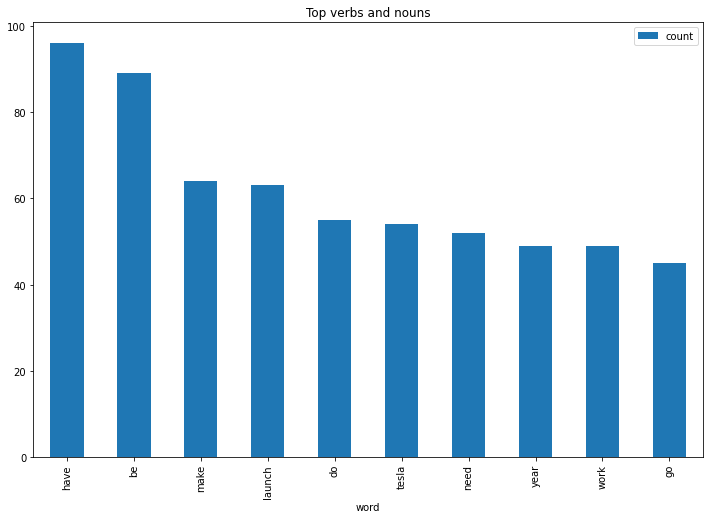

In [34]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wd_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

## Emotion Mining - Sentiment Analysis

In [35]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [36]:
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [37]:
#Emotion Lexicon- Affin

affin = pd.read_csv('Afinn.csv', sep=',', encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [38]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [39]:
# Custom function
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sent(text: str=None):
    sent_score=0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [40]:
#MAnual testing

calculate_sent(text='idiot')

-3

In [41]:
#Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sent)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)

In [42]:
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [43]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [45]:
#negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [46]:
#positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [49]:
#Adding index column
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


<Figure size 1080x720 with 0 Axes>

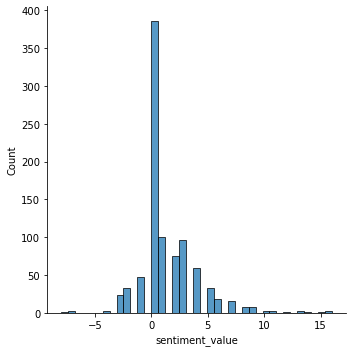

In [47]:
#Plotting the sentiment value for the whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.displot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

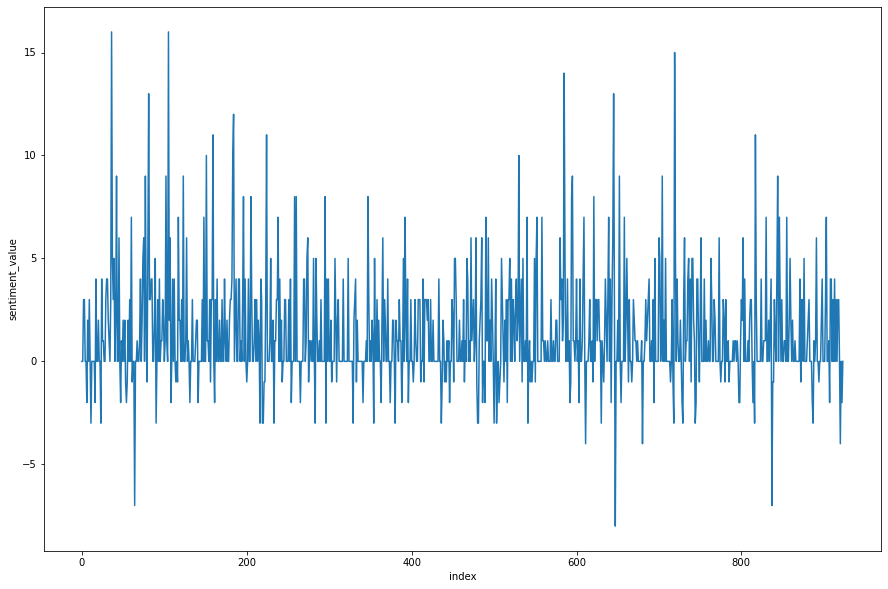

In [50]:
#Plotting the line plot for value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment values to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

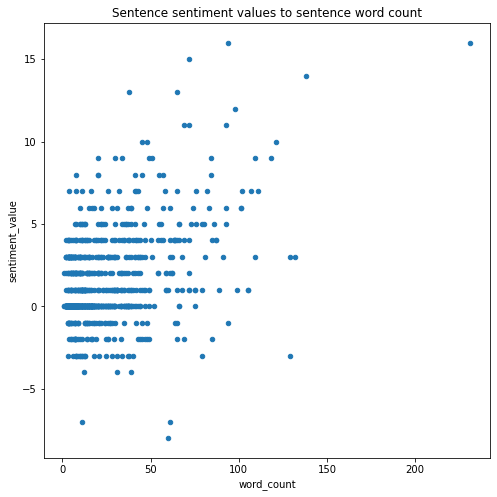

In [51]:
#Correlation analysis
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment values to sentence word count')